# 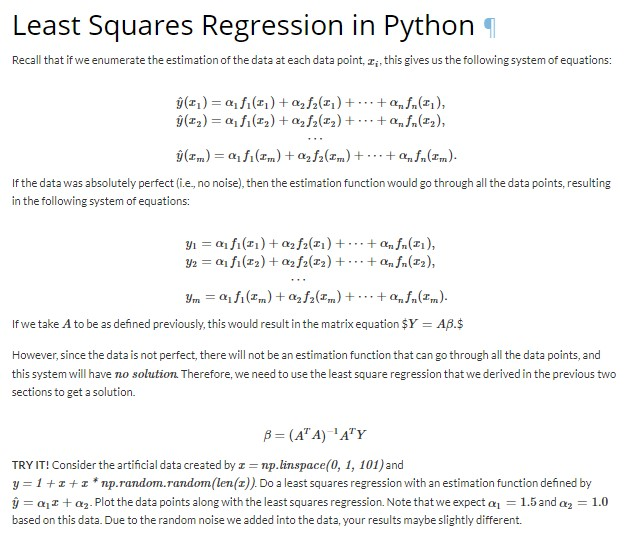

# **Use direct inverse method**

In [2]:
#from IPython.core.debugger import InterruptiblePdb as  ipdb
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
#%pdb on
#ipdb.set_trace(context=6)
#%ipdb off
plt.style.use('seaborn-poster')



<ipython-input-2-06fdec4fff4b>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


In [3]:
# generate x and y
x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))

In [4]:
# assemble matrix A
A = np.vstack([x, np.ones(len(x))]).T
print(A)

# turn y into a column vector
y = y[:, np.newaxis]

[[0.   1.  ]
 [0.01 1.  ]
 [0.02 1.  ]
 [0.03 1.  ]
 [0.04 1.  ]
 [0.05 1.  ]
 [0.06 1.  ]
 [0.07 1.  ]
 [0.08 1.  ]
 [0.09 1.  ]
 [0.1  1.  ]
 [0.11 1.  ]
 [0.12 1.  ]
 [0.13 1.  ]
 [0.14 1.  ]
 [0.15 1.  ]
 [0.16 1.  ]
 [0.17 1.  ]
 [0.18 1.  ]
 [0.19 1.  ]
 [0.2  1.  ]
 [0.21 1.  ]
 [0.22 1.  ]
 [0.23 1.  ]
 [0.24 1.  ]
 [0.25 1.  ]
 [0.26 1.  ]
 [0.27 1.  ]
 [0.28 1.  ]
 [0.29 1.  ]
 [0.3  1.  ]
 [0.31 1.  ]
 [0.32 1.  ]
 [0.33 1.  ]
 [0.34 1.  ]
 [0.35 1.  ]
 [0.36 1.  ]
 [0.37 1.  ]
 [0.38 1.  ]
 [0.39 1.  ]
 [0.4  1.  ]
 [0.41 1.  ]
 [0.42 1.  ]
 [0.43 1.  ]
 [0.44 1.  ]
 [0.45 1.  ]
 [0.46 1.  ]
 [0.47 1.  ]
 [0.48 1.  ]
 [0.49 1.  ]
 [0.5  1.  ]
 [0.51 1.  ]
 [0.52 1.  ]
 [0.53 1.  ]
 [0.54 1.  ]
 [0.55 1.  ]
 [0.56 1.  ]
 [0.57 1.  ]
 [0.58 1.  ]
 [0.59 1.  ]
 [0.6  1.  ]
 [0.61 1.  ]
 [0.62 1.  ]
 [0.63 1.  ]
 [0.64 1.  ]
 [0.65 1.  ]
 [0.66 1.  ]
 [0.67 1.  ]
 [0.68 1.  ]
 [0.69 1.  ]
 [0.7  1.  ]
 [0.71 1.  ]
 [0.72 1.  ]
 [0.73 1.  ]
 [0.74 1.  ]
 [0.75 1.  ]
 [0.76 1.  ]

In [ ]:
# Direct least square regression
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)
print(alpha)

[[1.47510974]
 [1.01007047]]


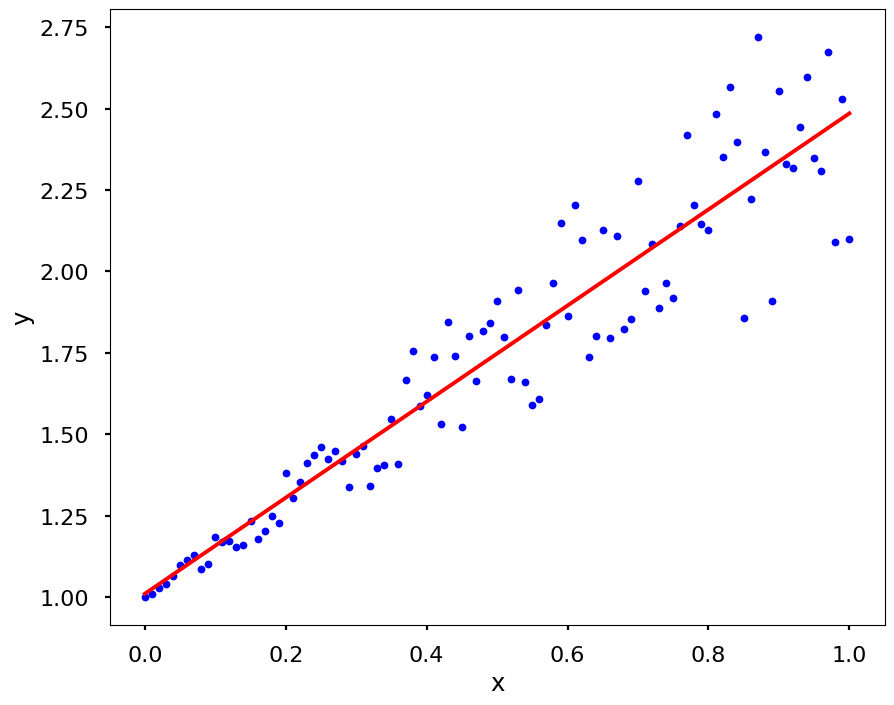

In [ ]:
# plot the results
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha[0]*x + alpha[1], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In Python, there are many different ways to conduct the least square regression. For example, we can use packages as numpy, scipy, statsmodels, sklearn and so on to get a least square solution. Here we will use the above example and introduce you more ways to do it. Feel free to choose one you like.


**Use the pseudoinverse**
We talked before that the (ATA)−1AT
 is called the pseudo-inverse, therefore, we could use the pinv function in numpy to directly calculate it.

In [ ]:
pinv = np.linalg.pinv(A)
alpha = pinv.dot(y)
print(alpha)

[[1.47510974]
 [1.01007047]]


**Use numpy.linalg.lstsq**
Actually, numpy has already implemented the least square methods that we can just call the function to get a solution. The function will return more things than the solution itself, please check the documentation for details:

In [ ]:
alpha = np.linalg.lstsq(A, y, rcond=None)[0]
print(alpha)

[[1.47510974]
 [1.01007047]]


**Use optimize.curve_fit from scipy**
This scipy function is actually very powerful, that it can fit not only linear functions, but many different function forms, such as non-linear function. Here we will show the linear example from above. Note that, using this function, we don’t need to turn y into a column vector.

In [ ]:
# generate x and y
x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))

def func(x, a, b):
    y = a*x + b
    return y

alpha = optimize.curve_fit(func, xdata = x, ydata = y)[0]
print(alpha)

[1.52859396 0.9973535 ]
